<a href="https://colab.research.google.com/github/PearMunchuporn/StockMarketPriceComAnalysis/blob/main/Stock_Market_Price_4_Companies_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
amirmotefaker_stock_market_analysis_data_path = kagglehub.dataset_download('amirmotefaker/stock-market-analysis-data')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-analysis-data/stocks.csv



**About Data**

**Given historical stock price data for Apple, Microsoft, Netflix and Google over the past three months since 7 Feb 2023 until 5 May 2023.**



**Import Dataset.**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
stock = pd.read_csv("/kaggle/input/stock-market-analysis-data/stocks.csv")
stock.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


**Check null values of dataset.**

In [ ]:
stock.isna().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Check duplicated values of dataset.**

In [ ]:
stock.duplicated().sum()

0

**Convert Date column from oject to datetime type.**

In [ ]:
stock['Date'] = pd.to_datetime(stock["Date"], errors='coerce'
                               ,format='%Y-%m-%d')

**Check Date has been successfully converted to datetime type.**

In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     248 non-null    object        
 1   Date       248 non-null    datetime64[ns]
 2   Open       248 non-null    float64       
 3   High       248 non-null    float64       
 4   Low        248 non-null    float64       
 5   Close      248 non-null    float64       
 6   Adj Close  248 non-null    float64       
 7   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 15.6+ KB


**Display dateframe.**

In [ ]:
stock.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


**Plot graph to compare volumne of each tech companies******

**Apple is the most traded stock and Netflix is lowest trading stock.**

Text(0, 0.5, 'Volume (Ten Million)')

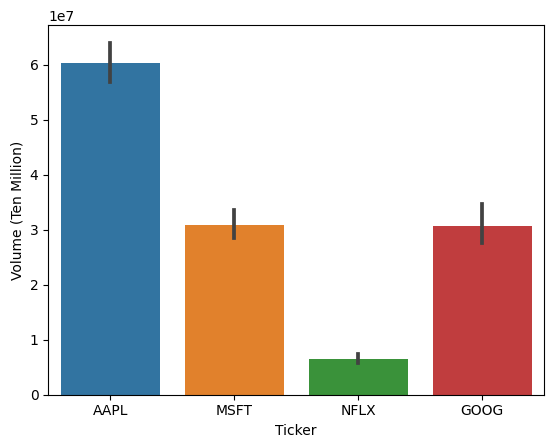

In [ ]:
sns.barplot(data=stock, x='Ticker' , y='Volume')
plt.ylabel("Volume (Ten Million)")

**Separate each tech company from stock dataframe.**

In [ ]:
apple = stock[stock['Ticker'] =='AAPL']
apple.tail()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
57,AAPL,2023-05-01,169.279999,170.449997,168.639999,169.589996,169.589996,52472900
58,AAPL,2023-05-02,170.089996,170.350006,167.539993,168.539993,168.539993,48425700
59,AAPL,2023-05-03,169.500000,170.919998,167.160004,167.449997,167.449997,65136000
60,AAPL,2023-05-04,164.889999,167.039993,164.309998,165.789993,165.789993,81235400
61,AAPL,2023-05-05,170.979996,174.300003,170.759995,173.570007,173.570007,113316400


In [ ]:
microsoft = stock[stock['Ticker'] =='MSFT']
microsoft.tail()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
119,MSFT,2023-05-01,306.970001,308.600006,305.149994,305.559998,305.559998,21294100
120,MSFT,2023-05-02,307.760010,309.179993,303.910004,305.410004,305.410004,26404400
121,MSFT,2023-05-03,306.619995,308.609985,304.089996,304.399994,304.399994,22360800
122,MSFT,2023-05-04,306.239990,307.760010,303.399994,305.410004,305.410004,22519900
123,MSFT,2023-05-05,305.720001,311.970001,304.269989,310.649994,310.649994,28181200


In [ ]:
netflix = stock[stock['Ticker'] =='NFLX']
netflix.tail()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
181,NFLX,2023-05-01,329.440002,331.230011,318.089996,324.119995,324.119995,5341500
182,NFLX,2023-05-02,325.000000,326.070007,315.619995,317.549988,317.549988,4318600
183,NFLX,2023-05-03,317.549988,324.619995,315.850006,319.299988,319.299988,5064100
184,NFLX,2023-05-04,319.010010,323.609985,317.950012,320.779999,320.779999,3879700
185,NFLX,2023-05-05,323.609985,324.149994,319.440002,322.760010,322.760010,3988600


In [ ]:
google = stock[stock['Ticker'] =='GOOG']
google.tail()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600
247,GOOG,2023-05-05,105.320000,106.440002,104.738998,106.214996,106.214996,20705300


**Convert Date column from object to datetime type.**

**After converting datatype. Check column Date have been successfully converted to datetime type.**

In [ ]:
apple['Date'] = pd.to_datetime(apple["Date"], errors='coerce'
                               ,format='%Y-%m-%d')
microsoft['Date'] = pd.to_datetime(microsoft["Date"], errors='coerce'
                               ,format='%Y-%m-%d')
netflix['Date'] = pd.to_datetime(netflix["Date"], errors='coerce'
                               ,format='%Y-%m-%d')
google['Date'] = pd.to_datetime(google["Date"], errors='coerce'
                               ,format='%Y-%m-%d')
apple.info()
microsoft.info()
netflix.info()
google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     62 non-null     object        
 1   Date       62 non-null     datetime64[ns]
 2   Open       62 non-null     float64       
 3   High       62 non-null     float64       
 4   Low        62 non-null     float64       
 5   Close      62 non-null     float64       
 6   Adj Close  62 non-null     float64       
 7   Volume     62 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 4.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 62 to 123
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     62 non-null     object        
 1   Date       62 non-null     datetime64[ns]
 2   Open       62 non-null     float64       
 3   High       62

**Plot volume of each tech company for displaying the day highest and lowest volume**

**AAPL close stock was the most on 5 May 2023 and the lowest trading on 17 Apr 2023.**

Text(0.5, 0, 'Date')

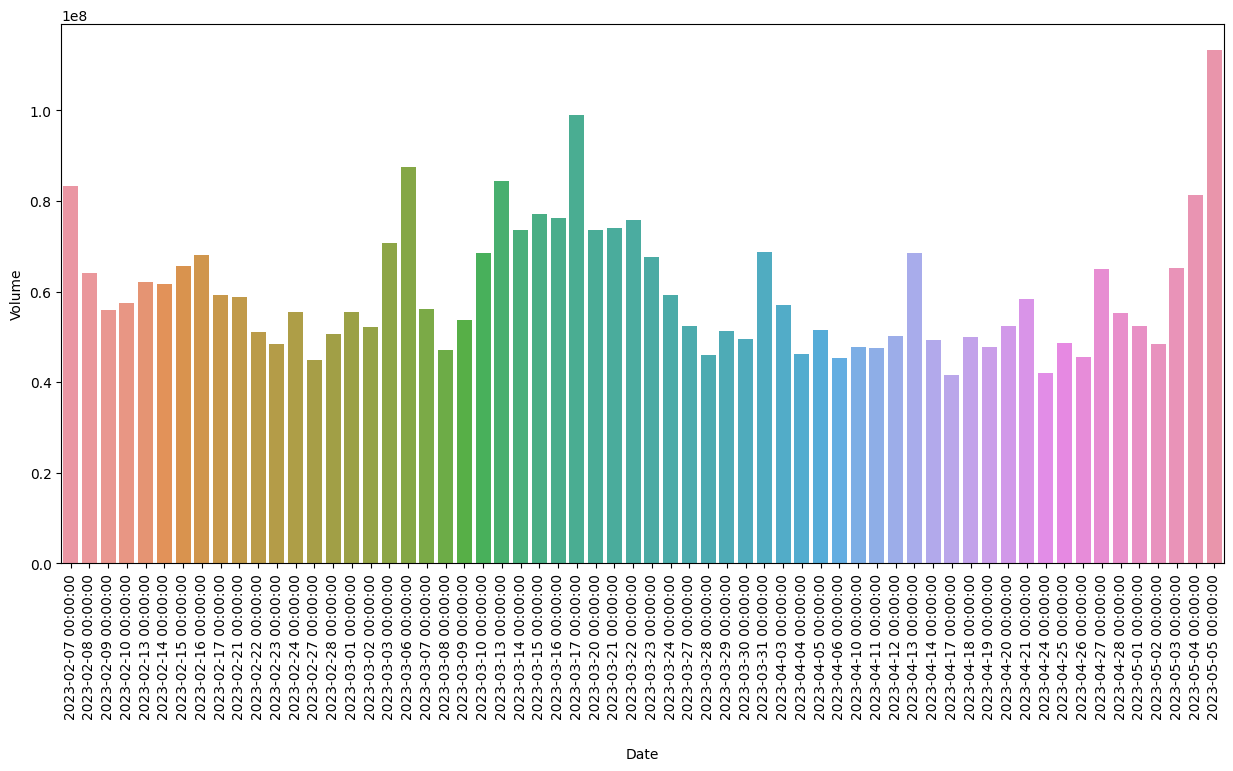

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=90)
sns.barplot(data=apple, x='Date' , y='Volume')
plt.xlabel("Date" ,labelpad=20)

**MSFT close stock was the most on 17 Mar 2023 and the lowest trading on 19 Apr 2023.**

Text(0.5, 0, 'Date')

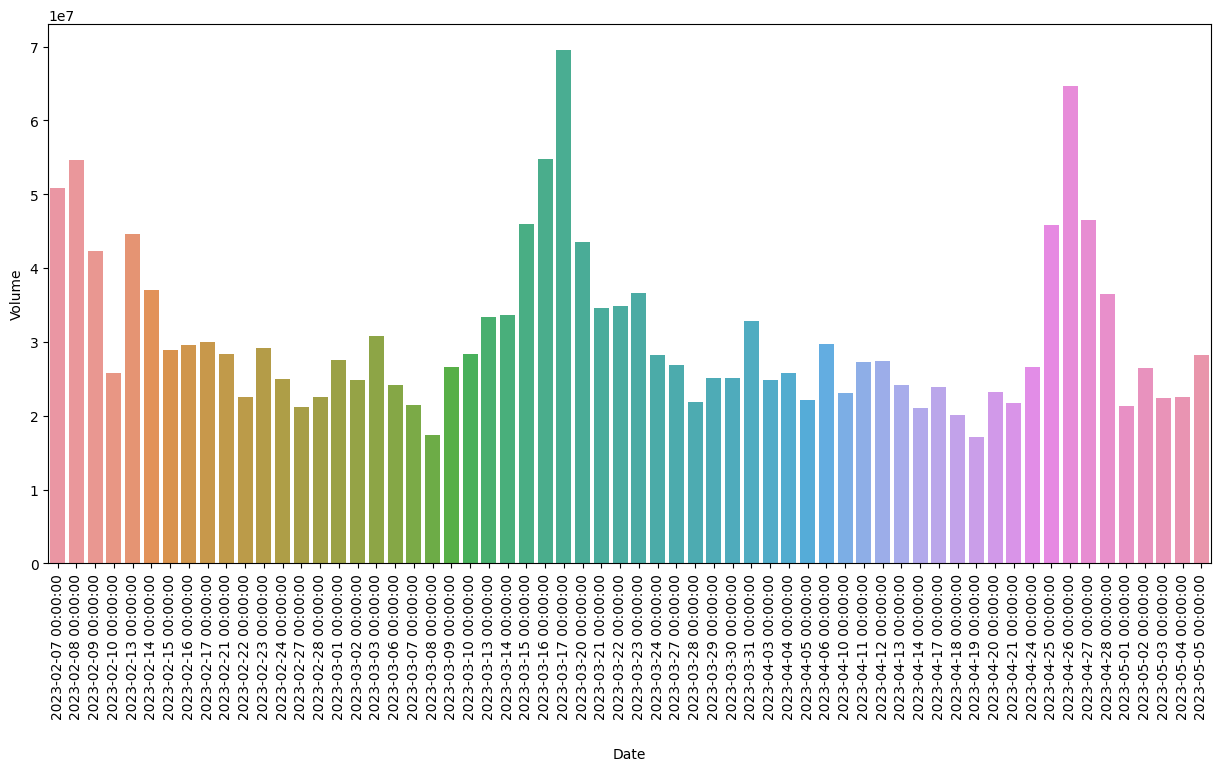

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=90)
sns.barplot(data=microsoft, x='Date' , y='Volume')
plt.xlabel("Date" , labelpad=20)

**NFLX close stock was the most traded on 19 Apr 2023 and the lowest trading on 10 Apr 2023.**

Text(0.5, 0, 'Date')

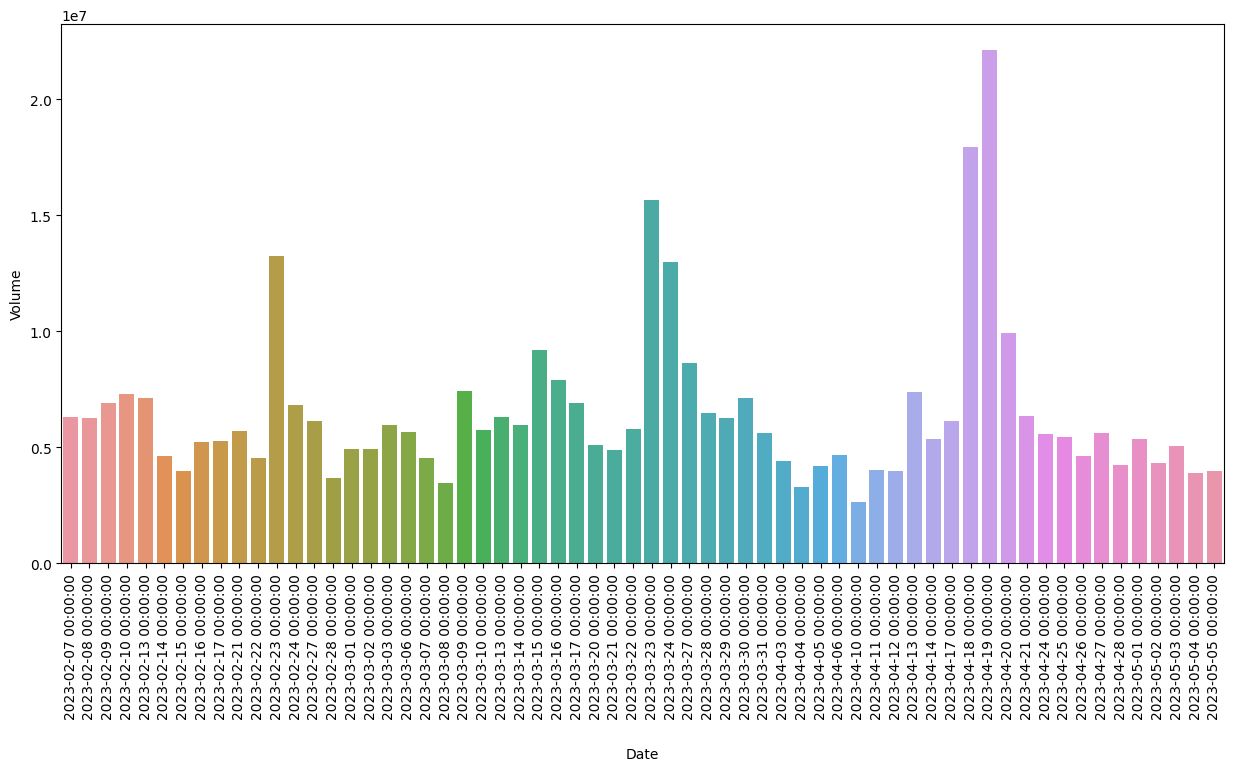

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=90)
sns.barplot(data=netflix, x='Date' , y='Volume')
plt.xlabel("Date" , labelpad=20)

**GOOG close stock was the most traded on 9 Feb 2023 and the lowest on 19 Apr 2023.**

Text(0.5, 0, 'Date')

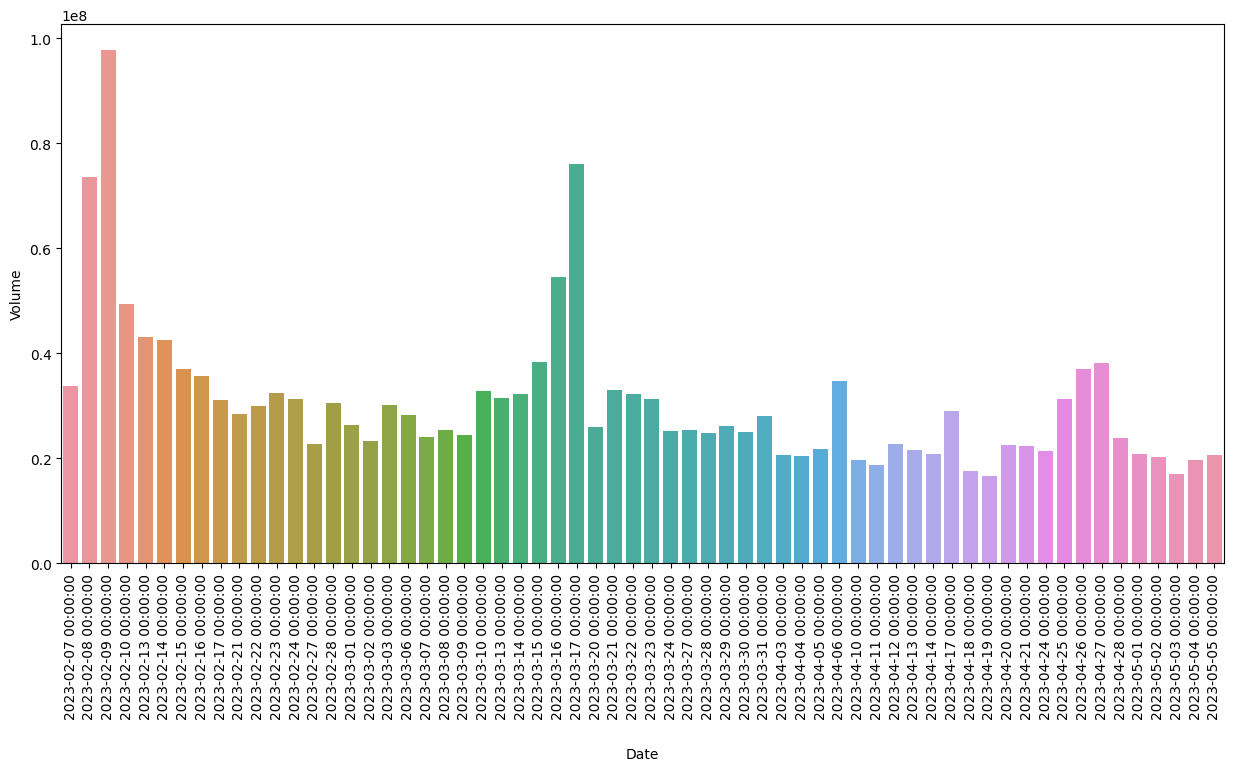

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=90)
sns.barplot(data=google, x='Date' , y='Volume')
plt.xlabel("Date" , labelpad=20)

**Plot graph to compare Close price each of company.**

**Netflix is higest close stock price and Google is lowest close stock price.**

(array([19403., 19417., 19431., 19448., 19462., 19478.]),
 [Text(19403.0, 0, '2023-02-15'),
  Text(19417.0, 0, '2023-03-01'),
  Text(19431.0, 0, '2023-03-15'),
  Text(19448.0, 0, '2023-04-01'),
  Text(19462.0, 0, '2023-04-15'),
  Text(19478.0, 0, '2023-05-01')])

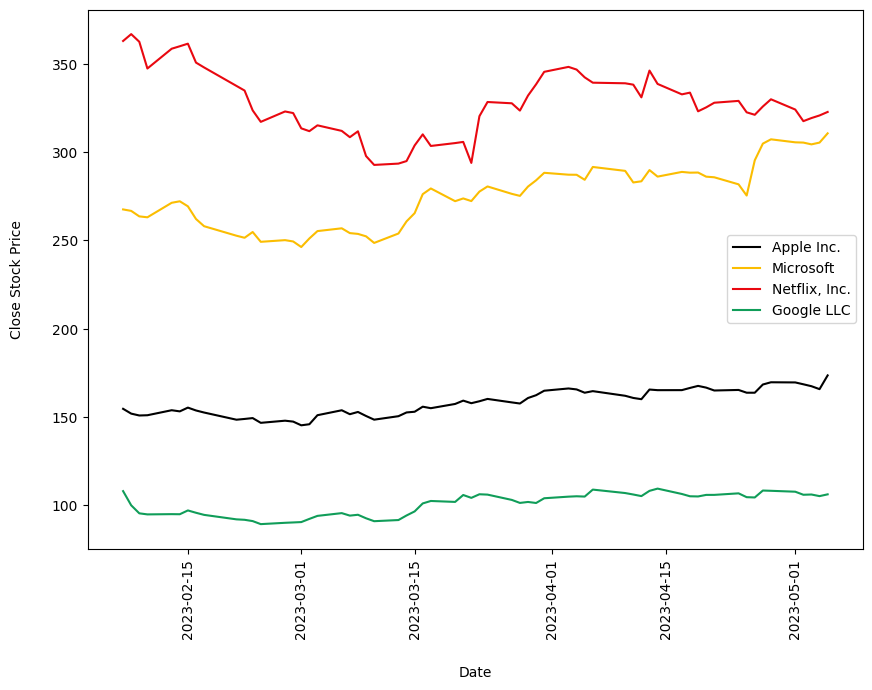

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(apple['Date'] , apple['Close'] ,color='#000' , label='Apple Inc.')
plt.plot(microsoft['Date'] , microsoft['Close'] ,color='#fbbd01' , label='Microsoft')
plt.plot(netflix['Date'] , netflix['Close'] ,color='#e90810' , label='Netflix, Inc.')
plt.plot(google['Date'] , google['Close'] ,color='#109d59' , label='Google LLC')
plt.xlabel('Date' ,labelpad=20)
plt.ylabel('Close Stock Price' ,labelpad=20)
plt.legend()

plt.xticks(rotation=90)


**Plot graph to display the higest close price and the lowest close price of each company.**

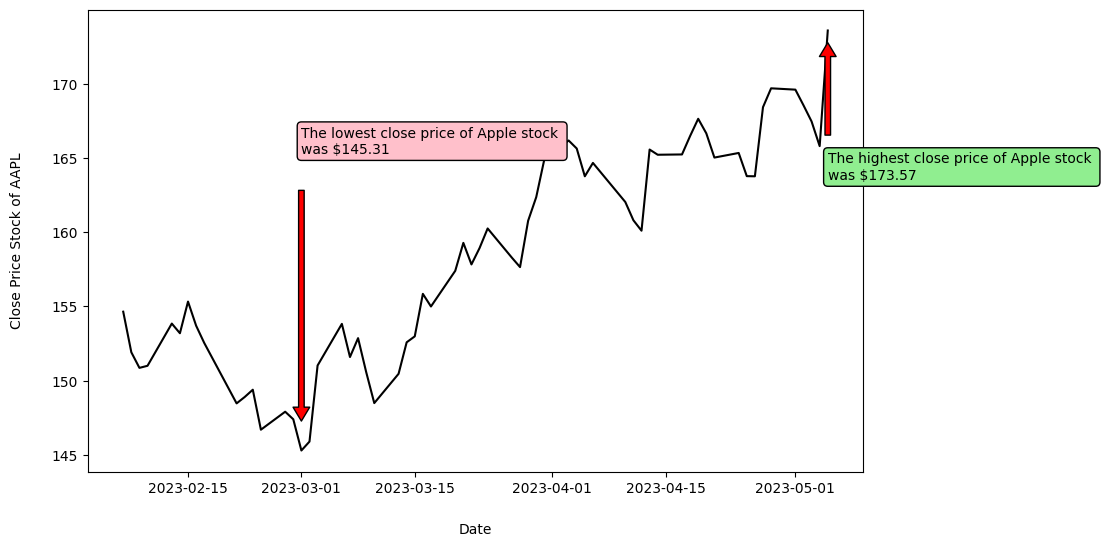

In [ ]:
def apple_stock_price(apple):
    high = apple['Close'].max()
    low = apple['Close'].min()

    datetime_high = apple[apple['Close'] == apple['Close'].max()]['Date']
    datetime_low = apple[apple['Close'] == apple['Close'].min()]['Date']

    fig, ax = plt.subplots(figsize=(10,6), )
    ax.plot(apple['Date'], apple['Close'], color='#000')

    ax.annotate(f"The highest close price of Apple stock \nwas ${high:0.2f}", xy=(datetime_high, high),xytext=(datetime_high,high-10),
                bbox=dict(boxstyle="round",facecolor='lightgreen'),
                 arrowprops=dict(facecolor='red',headlength=10, shrink=0.1 ))

    ax.annotate(f"The lowest close price of Apple stock \nwas ${low:0.2f} ", xy=(datetime_low,low),xytext=(datetime_low,low+20),
                bbox=dict(boxstyle="round",facecolor='pink'),
                 arrowprops=dict(facecolor='red',headlength=10, shrink=0.1 ))
    plt.ylabel('Close Price Stock of AAPL' , labelpad=20)
    plt.xlabel('Date' , labelpad=20)
    plt.show()


apple_stock_price(apple)


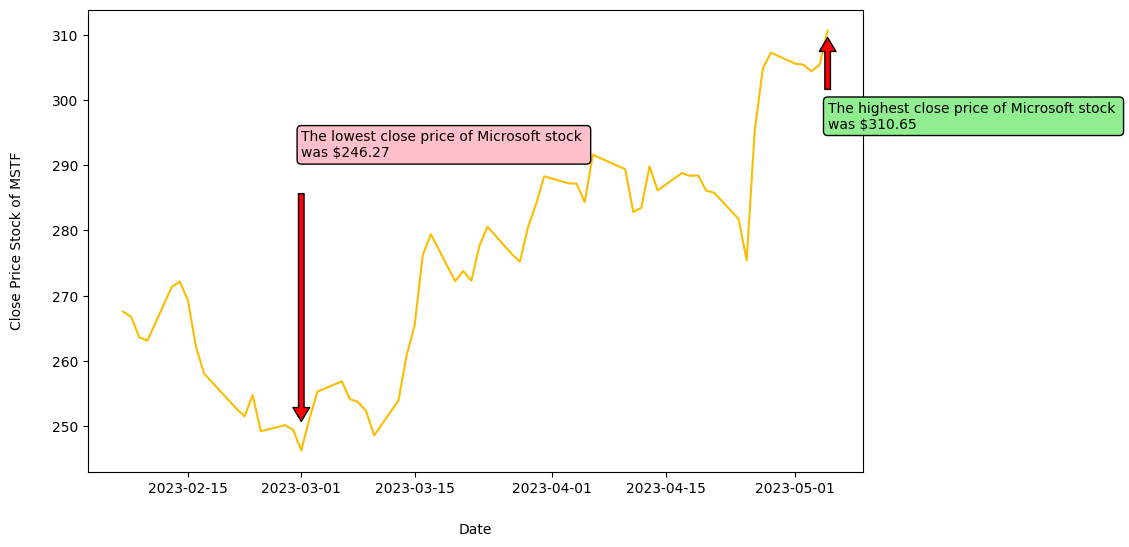

In [ ]:
def microsoft_stock_price(microsoft):
    high = microsoft['Close'].max()
    low = microsoft['Close'].min()

    datetime_high = microsoft[microsoft['Close'] == microsoft['Close'].max()]['Date']
    datetime_low = microsoft[microsoft['Close'] == microsoft['Close'].min()]['Date']


    fig, ax = plt.subplots(figsize=(10,6))

    ax.plot(microsoft['Date'], microsoft['Close'], color='#fbbd01')

    ax.annotate(f"The highest close price of Microsoft stock \nwas ${high:0.2f}", xy=(datetime_high, high),
                 xytext=(datetime_high,high-15),
                 bbox=dict(boxstyle="round",facecolor='lightgreen'),
                 arrowprops=dict(facecolor='red',headlength=10, shrink=0.1 ))

    ax.annotate(f"The lowest close price of Microsoft stock \nwas ${low:0.2f}", xy=(datetime_low,low),
                 xytext=(datetime_low,low+45),
                 bbox=dict(boxstyle="round",facecolor='pink'),
                 arrowprops=dict(facecolor='red',headlength=10, shrink=0.1 ))

    plt.ylabel('Close Price Stock of MSTF' , labelpad=20)
    plt.xlabel('Date' , labelpad=20)
    plt.show()

microsoft_stock_price(microsoft)

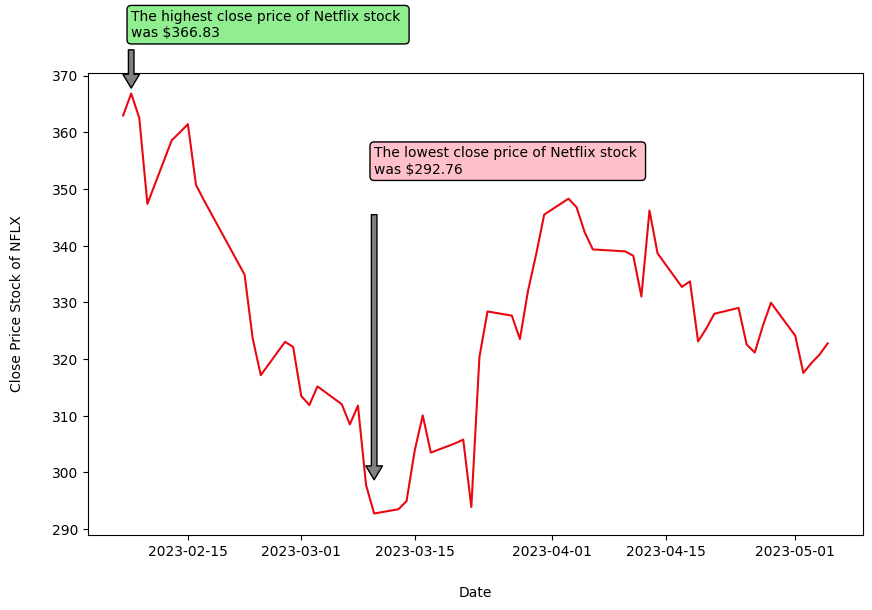

In [ ]:
def netflix_stock_price(netflix):
    high = netflix['Close'].max()
    low = netflix['Close'].min()
    datetime_high = netflix[netflix['Close'] == netflix['Close'].max()]['Date'].values

    datetime_low = netflix[netflix['Close'] == netflix['Close'].min()]['Date'].values

    fig, ax = plt.subplots(figsize=(10,6) )
    ax.plot(netflix['Date'], netflix['Close'], color='#e90810')

    ax.annotate(f"The highest close price of Netflix stock \nwas ${high:0.2f}", xy=(datetime_high, high),xytext=(datetime_high,high+10),
                bbox=dict(boxstyle="round",facecolor='lightgreen'),
                 arrowprops=dict(facecolor='grey',headlength=10, shrink=0.1 ))

    ax.annotate(f"The lowest close price of Netflix stock \nwas ${low:0.2f}", xy=(datetime_low,low),xytext=(datetime_low,low+60),
                bbox=dict(boxstyle="round",facecolor='pink'),
                 arrowprops=dict(facecolor='grey',headlength=10, shrink=0.1 ))
    plt.ylabel('Close Price Stock of NFLX' , labelpad=20)
    plt.xlabel('Date' , labelpad=20)
    plt.show()

    plt.show()

netflix_stock_price(netflix)

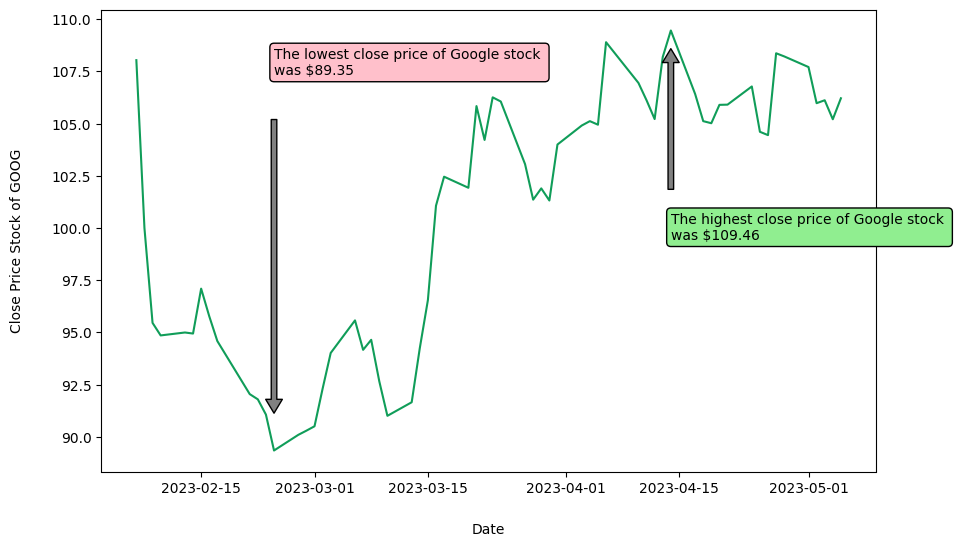

In [ ]:
def google_stock_price(google):
    high = google['Close'].max()
    low = google['Close'].min()
    datetime_high = google[google['Close'] == google['Close'].max()]['Date'].values

    datetime_low = google[google['Close'] == google['Close'].min()]['Date'].values

    fig, ax = plt.subplots(figsize=(10,6), )
    ax.plot(google['Date'], google['Close'], color='#109d59')

    ax.annotate(f"The highest close price of Google stock \nwas ${high:0.2f}", xy=(datetime_high, high),xytext=(datetime_high,high-10),
                bbox=dict(boxstyle="round",facecolor='lightgreen'),
                 arrowprops=dict(facecolor='grey',headlength=10, shrink=0.1 ))

    ax.annotate(f"The lowest close price of Google stock \nwas ${low:0.2f}", xy=(datetime_low,low),xytext=(datetime_low,low+18),
                bbox=dict(boxstyle="round",facecolor='pink'),
                 arrowprops=dict(facecolor='grey',headlength=10, shrink=0.1 ))

    plt.ylabel('Close Price Stock of GOOG' , labelpad=20)
    plt.xlabel('Date' , labelpad=20)
    plt.show()

    plt.show()

google_stock_price(google)

**Plot candelstick for each of company.**

**Candlestick of AAPL stock.**

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=apple['Date'],
                open=apple['Open'],
                high=apple['High'],
                low=apple['Low'],
                close=apple['Close'] ,
                increasing_line_color= 'green', decreasing_line_color= 'red')])


fig.show()

**Candlestick of MSFT stock.**

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=microsoft['Date'],
                open=microsoft['Open'],
                high=microsoft['High'],
                low=microsoft['Low'],
                close=microsoft['Close'] ,
                increasing_line_color= 'green', decreasing_line_color= 'red')])

fig.show()

**Plot candlestick of NFLX stock.**

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=netflix['Date'],
                open=netflix['Open'],
                high=netflix['High'],
                low=netflix['Low'],
                close=netflix['Close'] ,
                increasing_line_color= 'green', decreasing_line_color= 'red')]
                )

fig.show()


**Plot candlestick of GOOG stock.**

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=google['Date'],
                open=google['Open'],
                high=google['High'],
                low=google['Low'],
                close=google['Close'] ,
                increasing_line_color= 'green', decreasing_line_color= 'red')])

fig.show()

**Find percentage changing price of close stock by the fomular pct = ((next price - previous price)/next price) x 100**

**Changing of stock price can measure growth rate.**

**The most growth rate stock is Netflix and The lowest growth rate is Google.**

In [ ]:
apple['Close_change'] = apple['Close'].pct_change()
apple_close_pce = apple['Close_change'].max()
apple['Max_Change_Close'] = apple['Close_change'].max()
print(apple)
print(f"Max close change of Apple {apple_close_pce*100} %")

microsoft['Close_change'] = microsoft['Close'].pct_change()
microsoft_close_pce = microsoft['Close_change'].max()
microsoft['Max_Change_Close'] = microsoft['Close_change'].max()
print(microsoft)
print(f"Max close change of Microsoft {microsoft_close_pce*100} %" )

netflix['Close_change'] = netflix['Close'].pct_change()
netflix_close_pce = netflix['Close_change'].max()
netflix['Max_Change_Close'] = netflix['Close_change'].max()
print(netflix)
print(f"Max close change of Netflix {netflix_close_pce*100} %" )

google['Close_change'] = google['Close'].pct_change()
google_close_pce = google['Close_change'].max()
google['Max_Change_Close'] = google['Close_change'].max()
print(google)
print(f"Max close change of Google {google_close_pce*100} %" )



   Ticker       Date        Open        High         Low       Close  \
0    AAPL 2023-02-07  150.639999  155.229996  150.639999  154.649994   
1    AAPL 2023-02-08  153.880005  154.580002  151.169998  151.919998   
2    AAPL 2023-02-09  153.779999  154.330002  150.419998  150.869995   
3    AAPL 2023-02-10  149.460007  151.339996  149.220001  151.009995   
4    AAPL 2023-02-13  150.949997  154.259995  150.919998  153.850006   
..    ...        ...         ...         ...         ...         ...   
57   AAPL 2023-05-01  169.279999  170.449997  168.639999  169.589996   
58   AAPL 2023-05-02  170.089996  170.350006  167.539993  168.539993   
59   AAPL 2023-05-03  169.500000  170.919998  167.160004  167.449997   
60   AAPL 2023-05-04  164.889999  167.039993  164.309998  165.789993   
61   AAPL 2023-05-05  170.979996  174.300003  170.759995  173.570007   

     Adj Close     Volume  Close_change  Max_Change_Close  
0   154.414230   83322600           NaN          0.046927  
1   151.688400 

**Plot graph to compare growth rate by each of company.**

****The most growth rate stock is Netflix and The lowest growth rate is Google.****

(array([19403., 19417., 19431., 19448., 19462., 19478.]),
 [Text(19403.0, 0, '2023-02-15'),
  Text(19417.0, 0, '2023-03-01'),
  Text(19431.0, 0, '2023-03-15'),
  Text(19448.0, 0, '2023-04-01'),
  Text(19462.0, 0, '2023-04-15'),
  Text(19478.0, 0, '2023-05-01')])

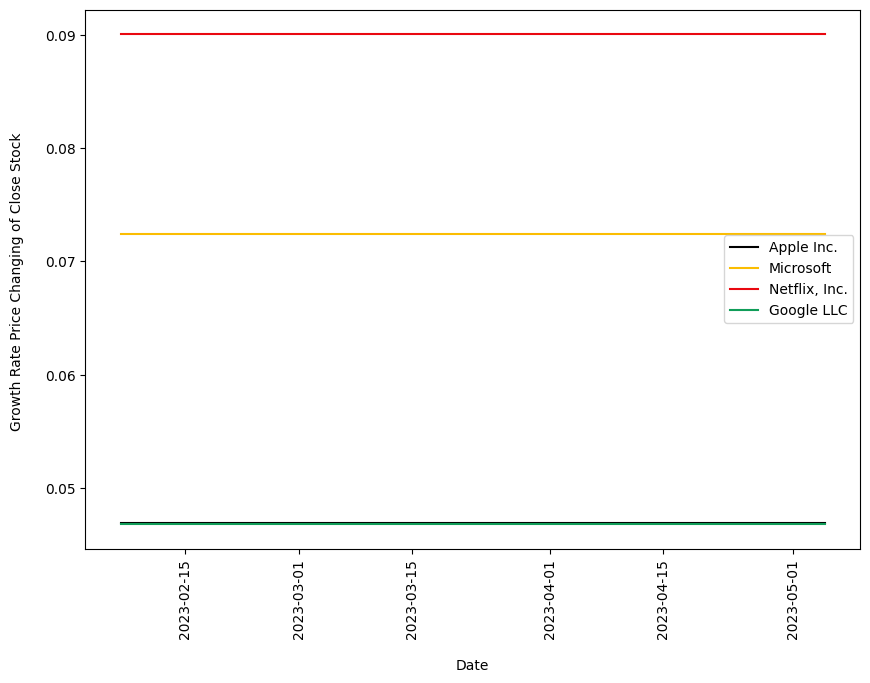

In [ ]:
fig, ax = plt.subplots(figsize=(10,7) )
plt.plot(apple['Date'] , apple['Max_Change_Close'] ,color='#000' , label='Apple Inc.')
plt.plot(microsoft['Date'] , microsoft['Max_Change_Close'] ,color='#fbbd01' , label='Microsoft')
plt.plot(netflix['Date'] , netflix['Max_Change_Close'] ,color='#e90810' , label='Netflix, Inc.')
plt.plot(google['Date'] , google['Max_Change_Close'] ,color='#109d59' , label='Google LLC')
plt.xlabel('Date' ,labelpad = 15)
plt.ylabel('Growth Rate Price Changing of Close Stock ' ,labelpad = 15)
plt.legend()
plt.xticks(rotation=90)

(array([19403., 19417., 19431., 19448., 19462., 19478.]),
 [Text(19403.0, 0, '2023-02-15'),
  Text(19417.0, 0, '2023-03-01'),
  Text(19431.0, 0, '2023-03-15'),
  Text(19448.0, 0, '2023-04-01'),
  Text(19462.0, 0, '2023-04-15'),
  Text(19478.0, 0, '2023-05-01')])

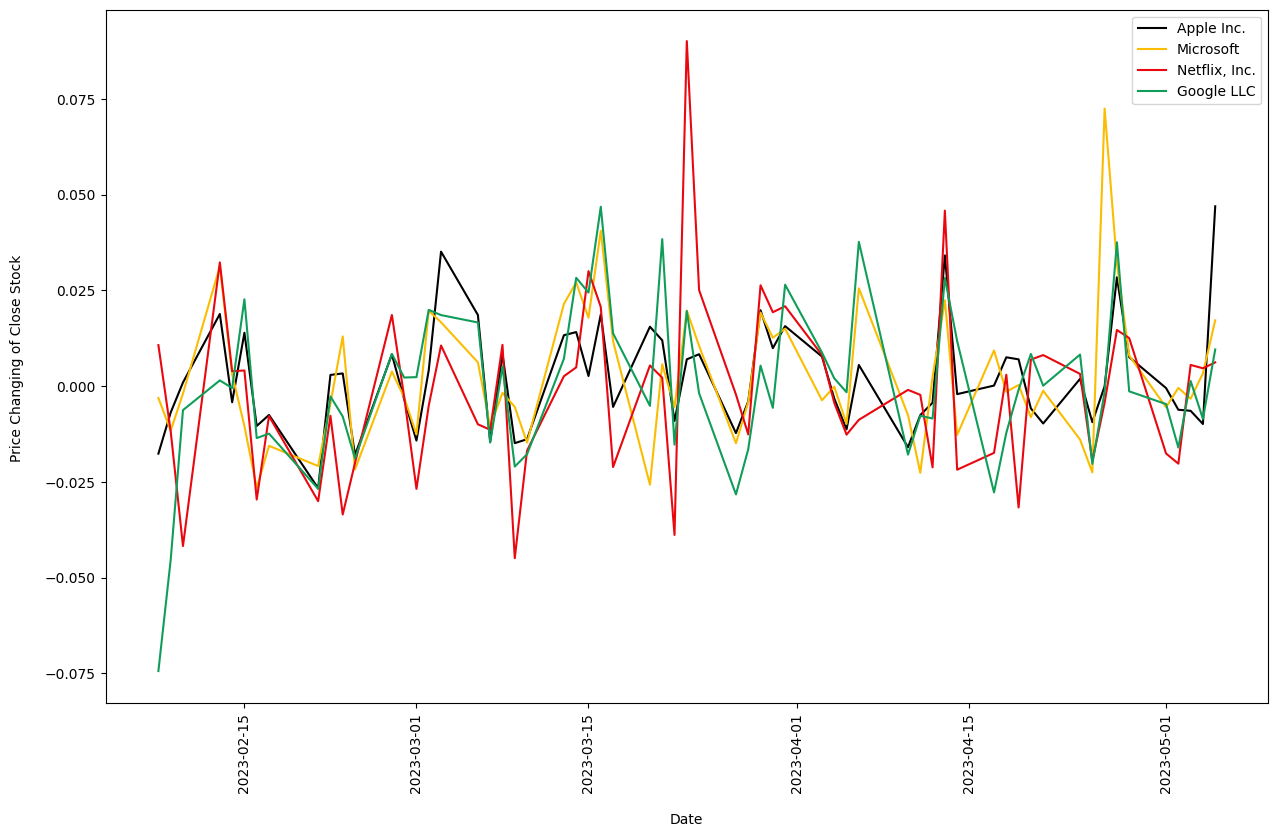

In [ ]:
fig, ax = plt.subplots(figsize=(15,9) )
plt.plot(apple['Date'] , apple['Close_change'] ,color='#000' , label='Apple Inc.')
plt.plot(microsoft['Date'] , microsoft['Close_change'] ,color='#fbbd01' , label='Microsoft')
plt.plot(netflix['Date'] , netflix['Close_change'] ,color='#e90810' , label='Netflix, Inc.')
plt.plot(google['Date'] , google['Close_change'] ,color='#109d59' , label='Google LLC')
plt.xlabel('Date' ,labelpad = 15)
plt.ylabel('Price Changing of Close Stock ' ,labelpad = 15)
plt.legend()
plt.xticks(rotation=90)

**Find percentage of changing of stock price by each company.**

In [ ]:
def find_pct(stock):
    prev = stock.iloc[0]
    Next = stock.iloc[-1]

    return ((Next - prev) / Next)*100 if Next else 0

variations = stock.groupby('Ticker')['Close'].expanding(min_periods=1).apply(find_pct)
stock= stock.assign(Percentage_Changing_Close=variations.droplevel(0))
stock.head()



,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Percentage_Changing_Close
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,0.000000
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,-1.796996
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,-2.505468
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,-2.410436
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,-0.519979


**Plot graph to display trend of changing of each stock price.**

**The most decreased changing close price stock is Netflix and The most increased price stock is Microsoft.**

Text(0, 0.5, 'Percentage of Changing Close Price')

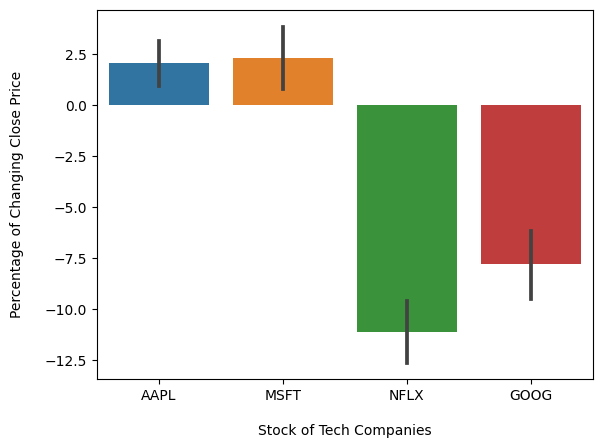

In [ ]:
sns.barplot(data=stock , x='Ticker' , y='Percentage_Changing_Close' )
plt.xlabel("Stock of Tech Companies" ,labelpad = 15)
plt.ylabel("Percentage of Changing Close Price" ,labelpad = 15)

**Plot graph to display changing of Apple close stock price.**

**The most increased changing price on 5 May 2023 and The most decreased changing price on 21 Feb 2023.**

Text(0, 0.5, 'Changing of Close Apple Price Stock.')

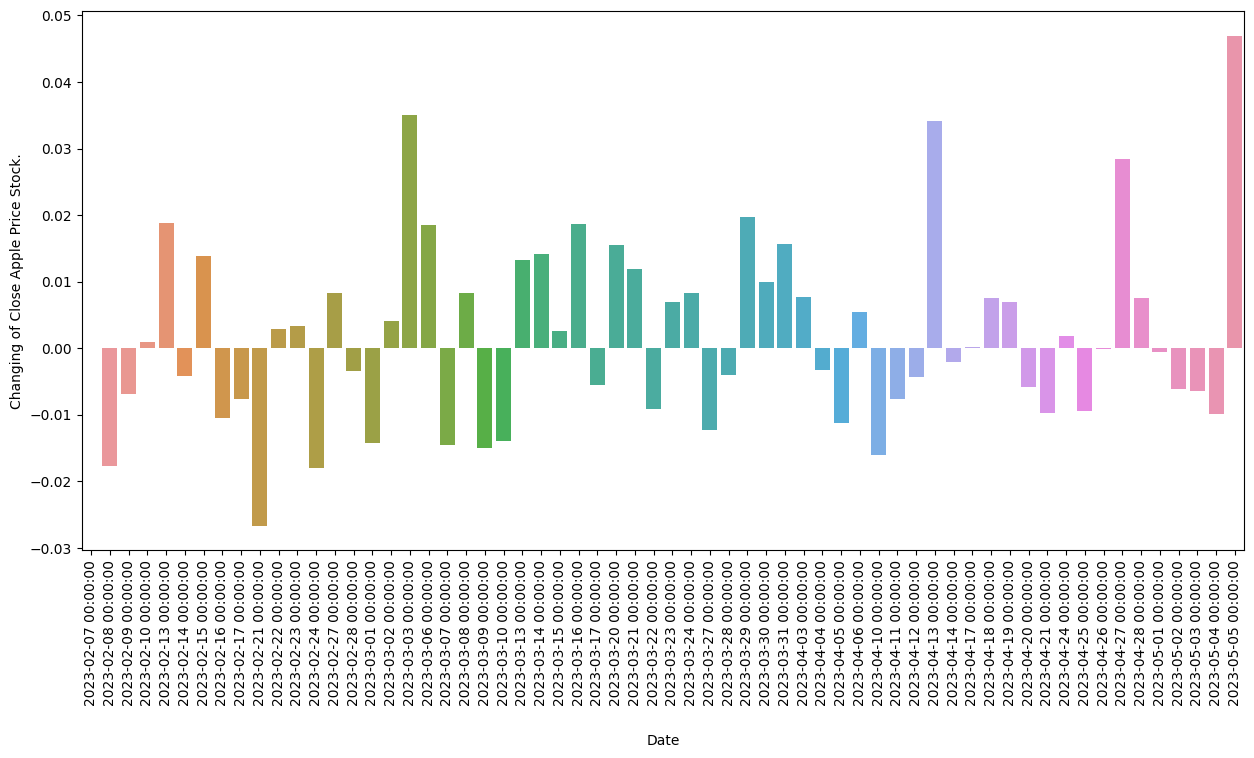

In [ ]:
fig, ax = plt.subplots(figsize=(15,7) )
plt.xticks(rotation=90)
sns.barplot(data=apple, x='Date' , y='Close_change')
plt.xlabel('Date' ,labelpad=20)
plt.ylabel('Changing of Close Apple Price Stock.')

**Plot graph to display changing of Microsoft close stock price.**

**The most increased changing price on 26 Apr 2023 and The most decreased changing price on 16 Feb 2023.**

most ['2023-04-26T00:00:00.000000000'] and low ['2023-02-16T00:00:00.000000000']


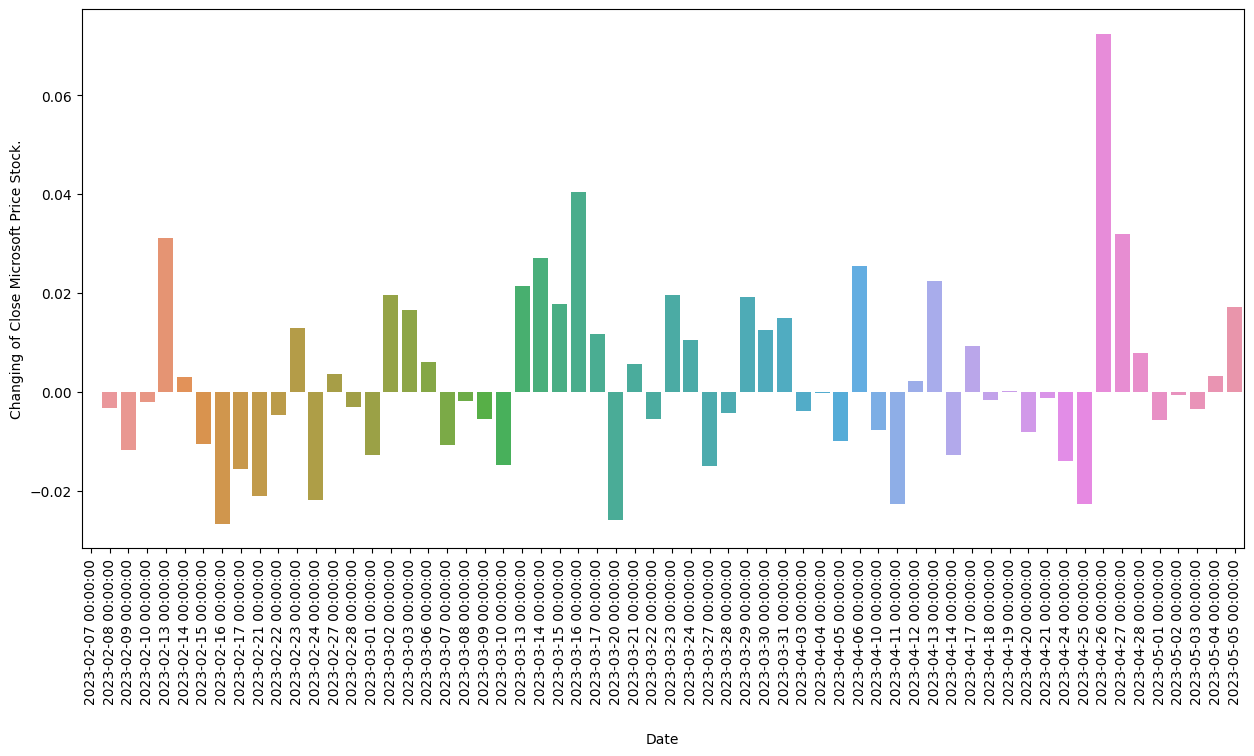

In [ ]:
fig, ax = plt.subplots(figsize=(15,7) )
plt.xticks(rotation=90)
sns.barplot(data=microsoft, x='Date' , y='Close_change')
plt.xlabel('Date' ,labelpad=20)
plt.ylabel('Changing of Close Microsoft Price Stock.')
datetime_high = microsoft[microsoft['Close_change'] == microsoft['Close_change'].max()]['Date'].values
datetime_low = microsoft[microsoft['Close_change'] == microsoft['Close_change'].min()]['Date'].values
print(f"most {datetime_high} and low {datetime_low}")

**Plot graph to display changing of Netflix close stock price.**

**The most increased changing price on 23 Mar 2023 and The most decreased changing price on 9 Mar 2023.**

Text(0, 0.5, 'Changing of Close Netflix Price Stock.')

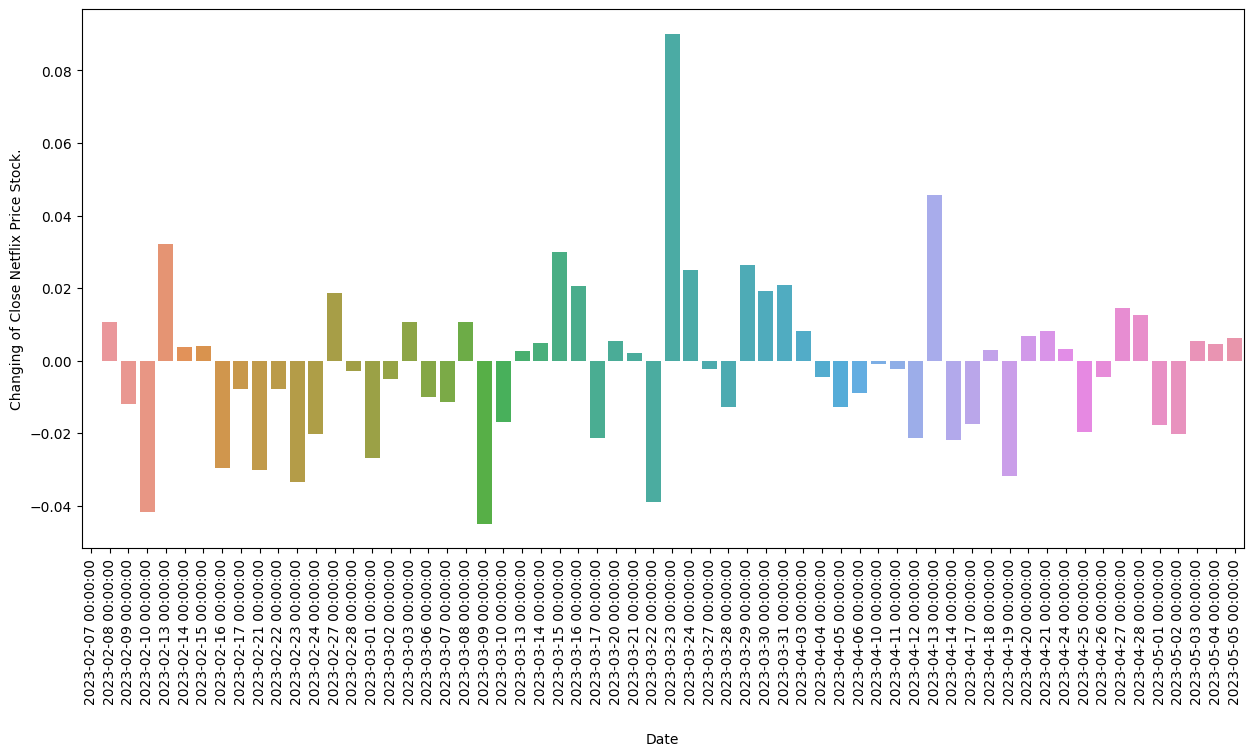

In [ ]:
fig, ax = plt.subplots(figsize=(15,7) )
plt.xticks(rotation=90)
sns.barplot(data=netflix, x='Date' , y='Close_change')
plt.xlabel('Date' ,labelpad=20)
plt.ylabel('Changing of Close Netflix Price Stock.')

**Plot graph to display changing of Google close stock price.**

**The most increased changing price on 16 Mar 2023 and The most decreased changing price on 8 Feb 2023.**

Text(0, 0.5, 'Changing of Close Google Price Stock.')

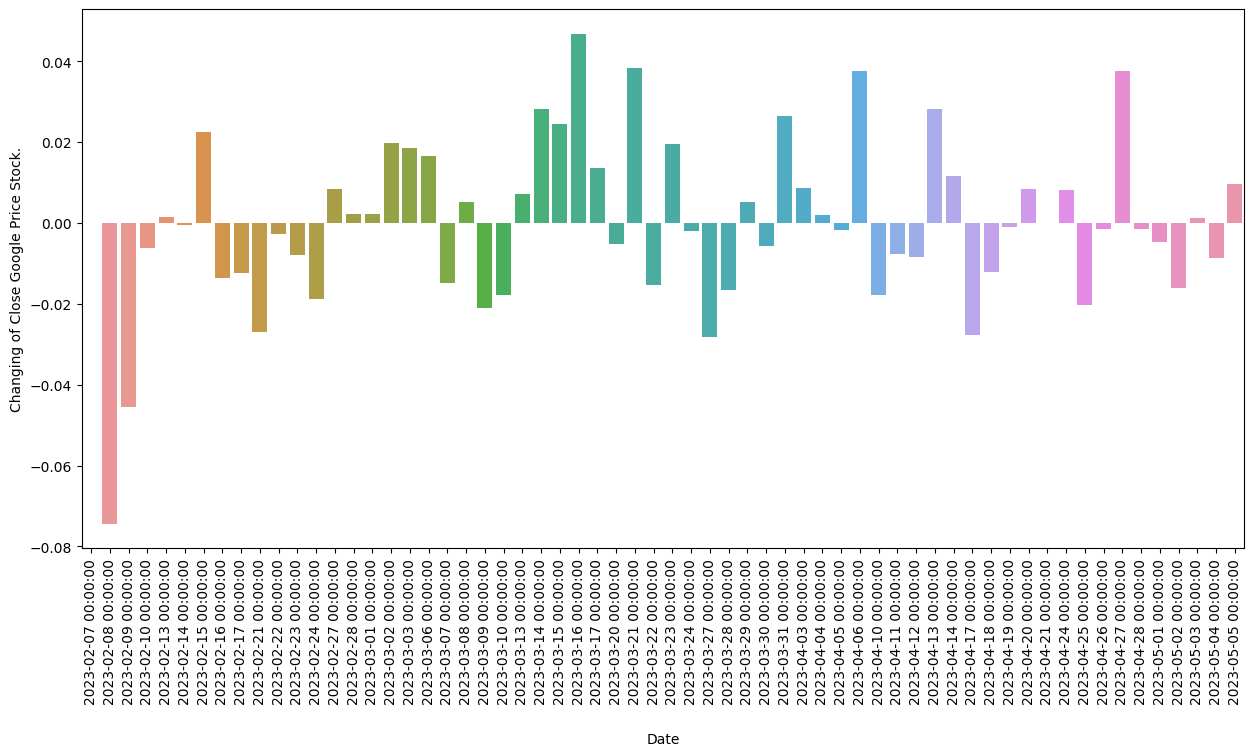

In [ ]:
fig, ax = plt.subplots(figsize=(15,7) )
plt.xticks(rotation=90)
sns.barplot(data=google, x='Date' , y='Close_change')
plt.xlabel('Date' ,labelpad=20)
plt.ylabel('Changing of Close Google Price Stock.')

**Find Simple Moving Average to indicate trend of stock and inform information about the price of buying stock to help the traders dicision for investment price.**

In [ ]:
def find_moving_avg(stock):
    stock['10_Days_Moving_Average'] = stock['Close'].rolling(window=10).mean()
    stock['20_Days_Moving_Average'] = stock['Close'].rolling(window=20).mean()
    stock['30_Days_Moving_Average'] = stock['Close'].rolling(window=30).mean()

    return stock

apple = find_moving_avg(apple)
microsoft = find_moving_avg(microsoft)
netfilx = find_moving_avg(netflix)
google = find_moving_avg(google)


**Creat function to plot graph for simple moving average.**
**Plot simple moving average graphs of close price each of company.**

In [ ]:
import plotly.tools as tls

aapl_mavg = apple.copy()
mstf_mavg = microsoft.copy()
nflx_mavg = netfilx.copy()
goog_mavg = google.copy()

def moving_average_plot(stock):

    stock = stock.set_index('Date')

    fig = tls.make_subplots(rows=1, cols=1, shared_xaxes=True)

    colors = ['blue', 'salmon', 'DeepPink']
    avgs = ['10_Days_Moving_Average','20_Days_Moving_Average','30_Days_Moving_Average']

    for col, c in zip(avgs, colors):
        fig.append_trace({'x': stock.index, 'y': stock[col], 'type': 'scatter', 'name': col, 'line': {'color': c}},1,1)
    for col in ['Close']:
        fig.append_trace({'x': stock.index, 'y': stock[col], 'type': 'scatter', 'name': 'Closing Price', 'line': {'color': 'DimGray'}},1,1)

    fig['layout'].update(height=400, width=900,title=f"Moving averages and Closing Price of {stock['Ticker'].unique()[0]}"
                  )
    fig.show()
import warnings
warnings.filterwarnings("ignore")
moving_average_plot(aapl_mavg)
moving_average_plot(mstf_mavg)
moving_average_plot(nflx_mavg)
moving_average_plot(goog_mavg)


**Find correlation of stock data to understand relationship about value of each stock type.**

**Find correlation of Apple stock.**

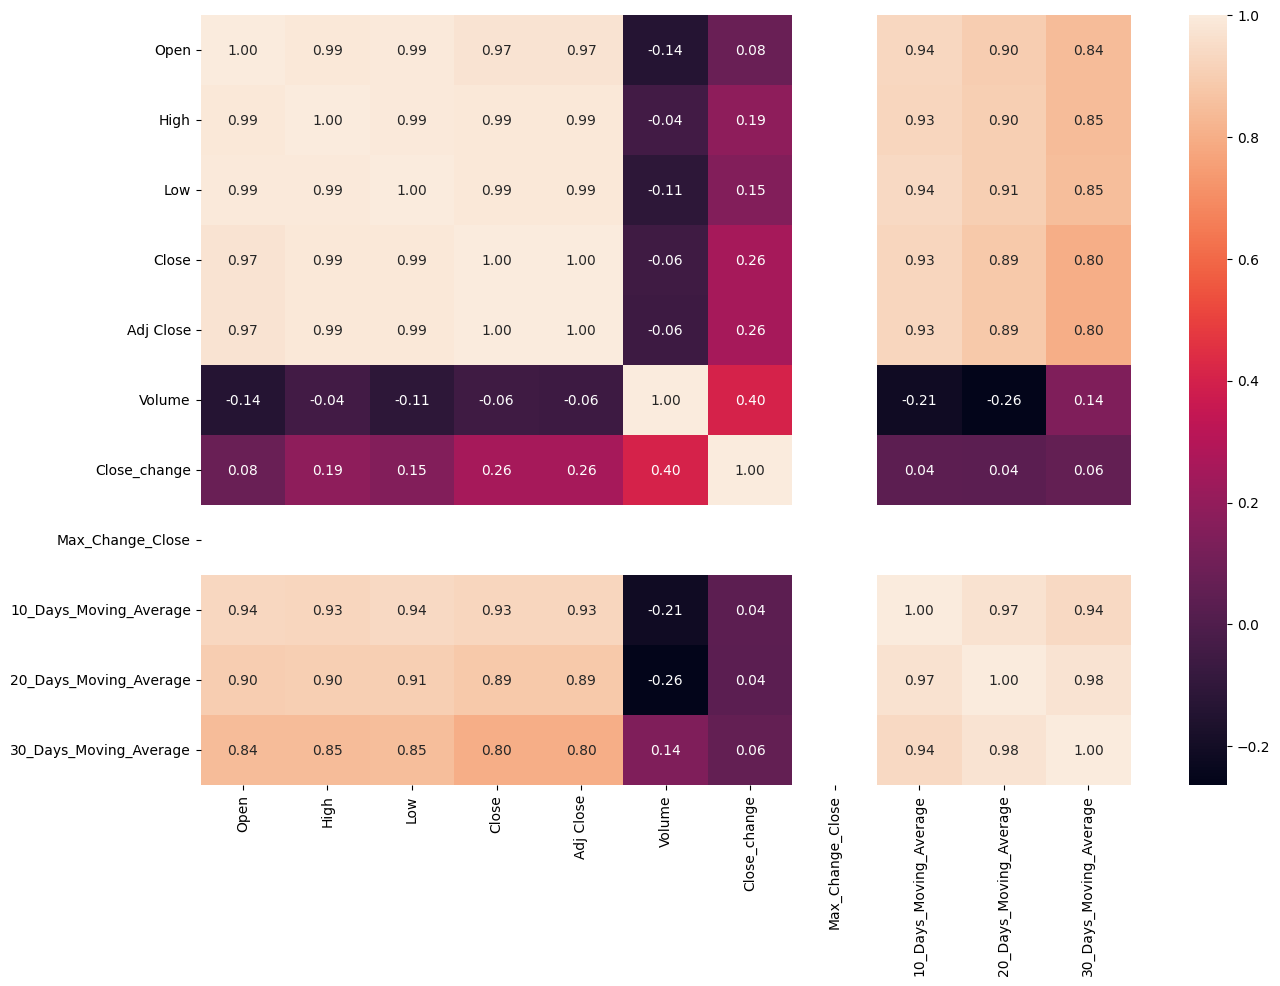

In [ ]:
corr_apple = apple.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 10))
sns.heatmap(corr_apple.corr(), annot=True, fmt=".2f")
plt.show()

**Find correlation of Microsoft stock.**

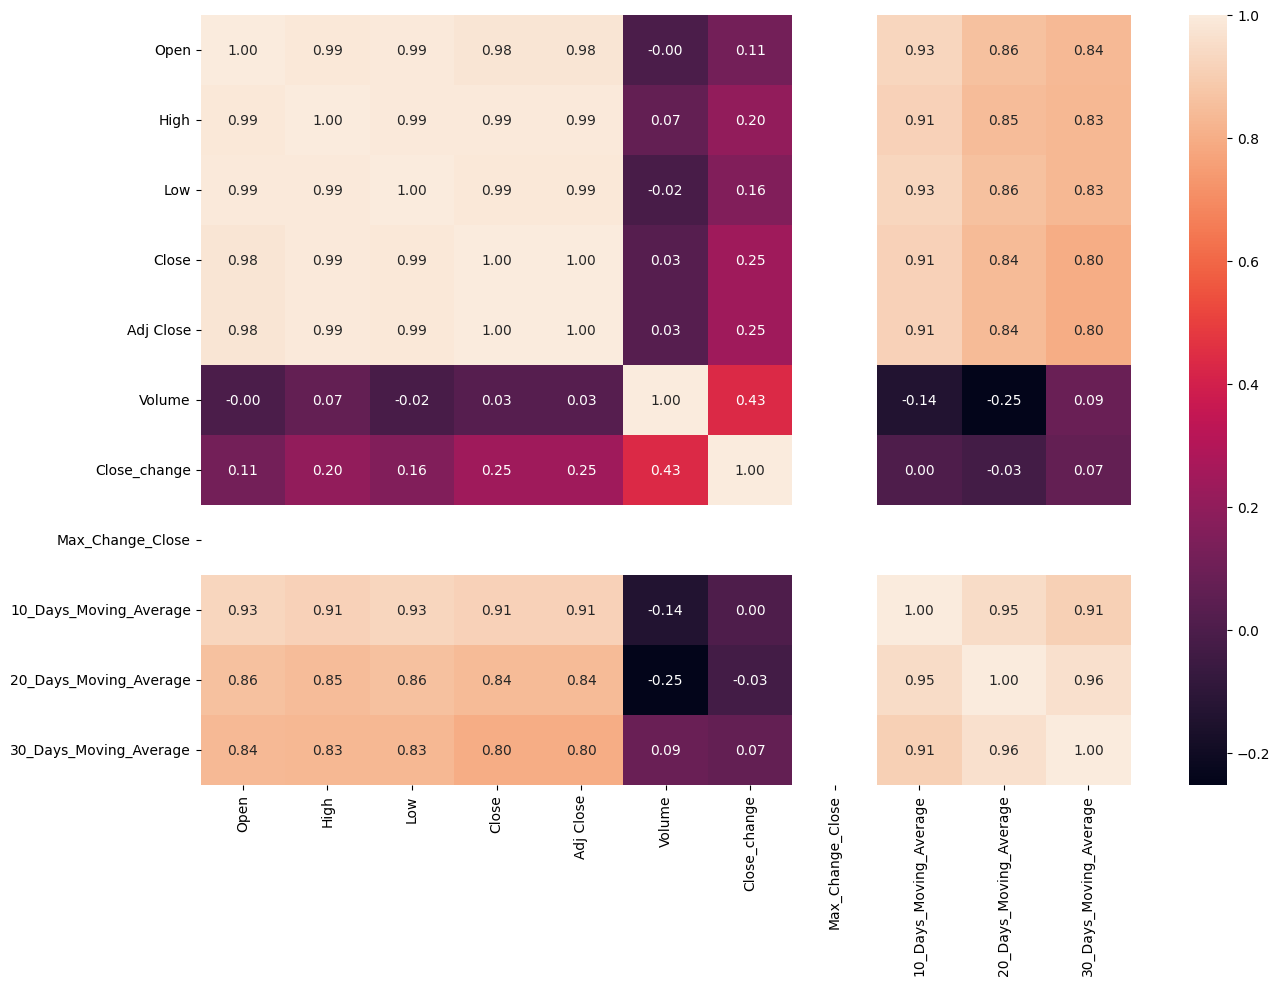

In [ ]:
corr_microsoft = microsoft.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 10))
sns.heatmap(corr_microsoft.corr(), annot=True, fmt=".2f")
plt.show()

**Find correlation of Netflix stock.**

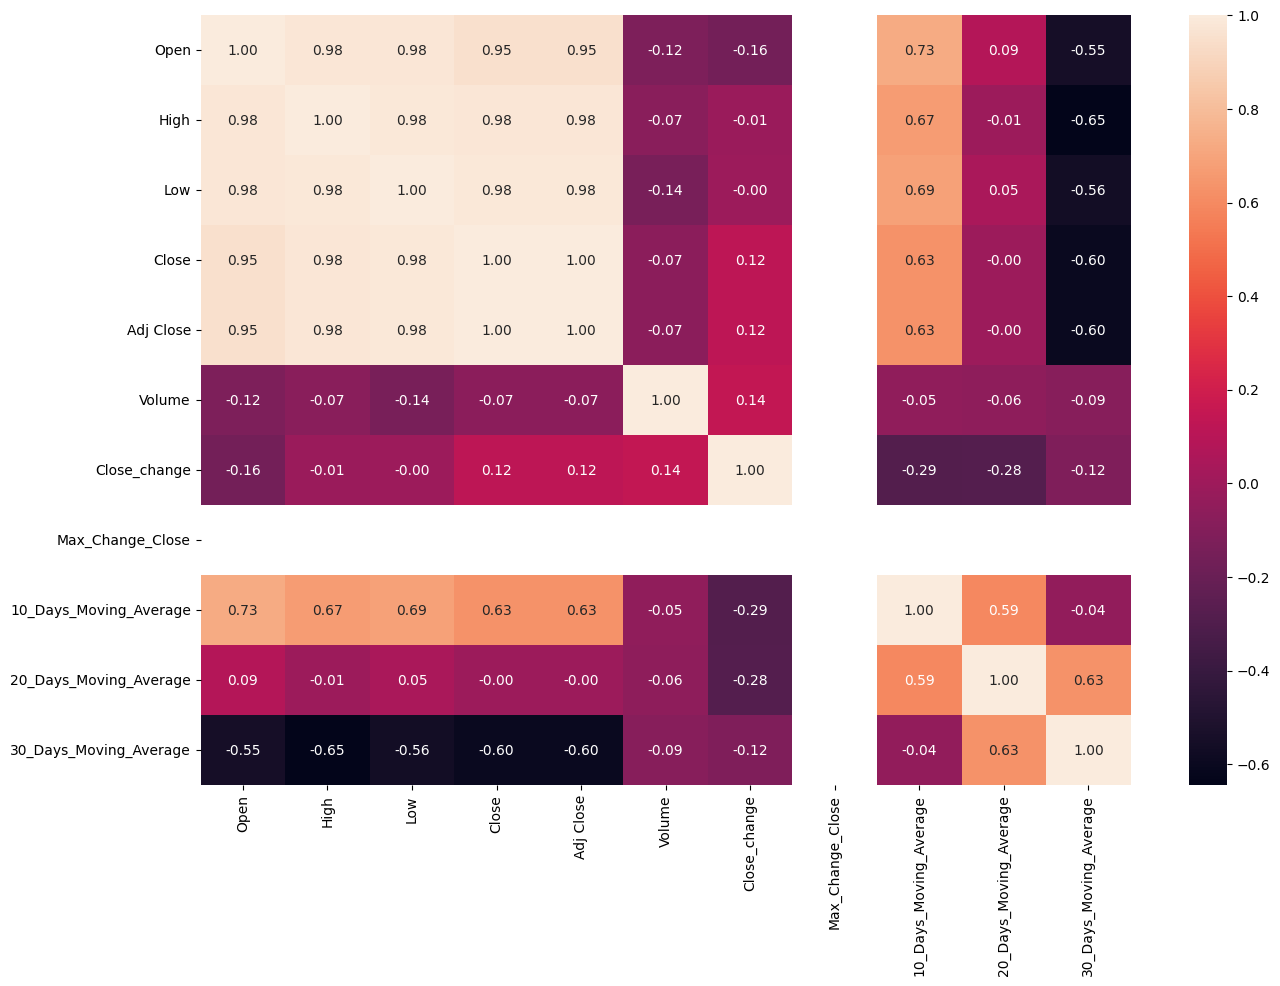

In [ ]:
corr_netflix = netflix.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 10))
sns.heatmap(corr_netflix.corr(), annot=True, fmt=".2f")
plt.show()

**Find correlation of Google stock.**

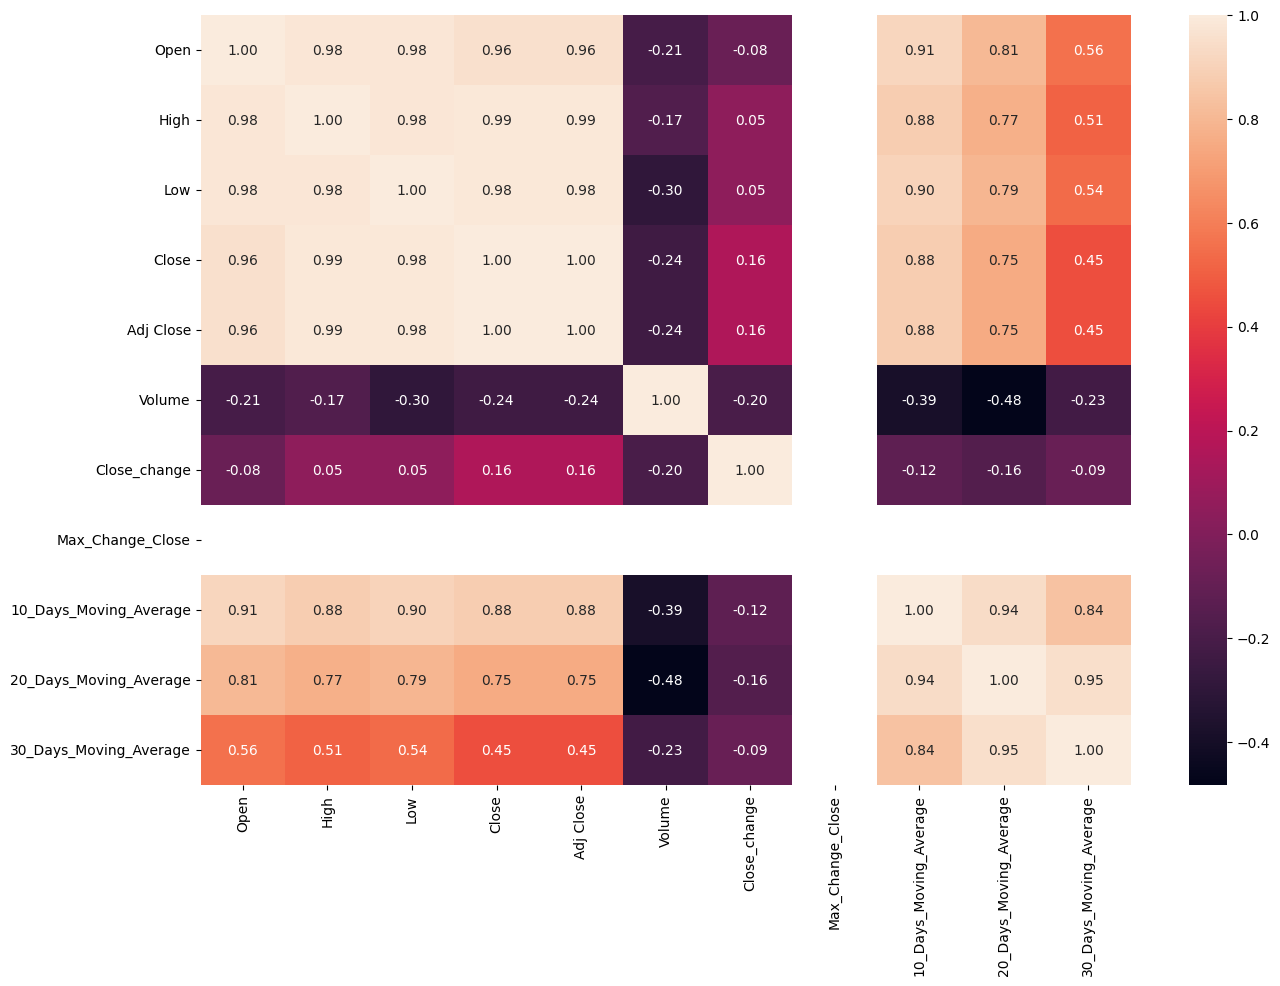

In [ ]:
corr_google = google.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 10))
sns.heatmap(corr_google.corr(), annot=True, fmt=".2f")
plt.show()